# Minimizing Cost

단순 그래프를 통해 W에 따라 cost가 변화되는 추세를 확인한다. 즉, cost 함수의 모양.

In [1]:
import tensorflow as tf

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
X = [1, 2, 3, 4, 5]
Y = [3, 6, 9, 12, 15]

W = tf.placeholder(tf.float32)

hypothesis = X * W

In [14]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
W_history = []
cost_history = []

# W를 -3 ~ 9 범위에서 0.1씩 증가
for i in range(-30, 90):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

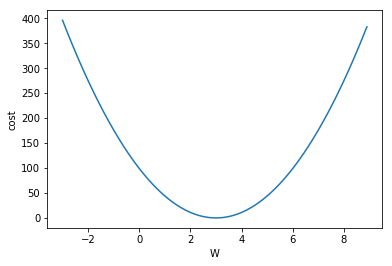

In [26]:
plt.plot(W_history, cost_history)
plt.xlabel('W')
plt.ylabel('cost')
plt.show()

# W = 3에서 cost가 최소인 것을 알 수 있다.

## Minimizing Cost : Gradient Descent

현재의 W값에서 현재 점의 기울기(cost function의 미분값)를 빼줌으로써 cost가 작아지는 방향으로 움직인다.

![img](./images/dl02-1.jpg)

In [32]:
x_train = [1, 2, 3, 4, 5]
y_train = [3, 6, 9, 12, 15]

W = tf.Variable(tf.random_normal([1]), name='weight')   # 변수 선언
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [33]:
# W = W - learning_rate * gradient
learning_rate = 0.01
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient

update = W.assign(descent)

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
for step in range(21):
    sess.run(update, feed_dict={X: x_train, Y: y_train})
    print(step, sess.run(cost, feed_dict={X: x_train, Y: y_train}), sess.run(W))

0 143.285 [-0.60914719]
1 113.496 [-0.21214104]
2 89.9005 [ 0.14119446]
3 71.2102 [ 0.45566308]
4 56.4056 [ 0.73554015]
5 44.6789 [ 0.9846307]
6 35.3901 [ 1.20632136]
7 28.0325 [ 1.40362597]
8 22.2046 [ 1.57922709]
9 17.5882 [ 1.73551214]
10 13.9316 [ 1.87460577]
11 11.0352 [ 1.99839914]
12 8.74102 [ 2.10857534]
13 6.92376 [ 2.20663214]
14 5.48431 [ 2.29390264]
15 4.34412 [ 2.37157345]
16 3.44098 [ 2.44070029]
17 2.7256 [ 2.50222325]
18 2.15895 [ 2.5569787]
19 1.7101 [ 2.60571098]
20 1.35457 [ 2.64908266]


In [36]:
# step - cost - W : cost 가 감소하면서 W가 목표값인 3으로 접근해가고 있다.

## Minimizing Cost : Use Optimizer

In [43]:
X = [1, 2, 3, 4, 5]
Y = [3, 6, 9, 12, 15]

W = tf.Variable(5.0)   # 임의의 값 설정.

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [49]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [50]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    if step % 200 == 0:
        sess.run(train)
        print(step, sess.run(W))

0 4.56
200 4.2168
400 3.9491
600 3.7403
800 3.57743
1000 3.4504
1200 3.35131
1400 3.27402
1600 3.21374
1800 3.16672
2000 3.13004
2200 3.10143
2400 3.07912
2600 3.06171
2800 3.04813
3000 3.03754
3200 3.02928
3400 3.02284
3600 3.01782
3800 3.0139
4000 3.01084
4200 3.00846
4400 3.00659
4600 3.00514
4800 3.00401
